<a href="https://colab.research.google.com/github/anncipher/Data_Science_Nigeria_Projects/blob/main/DSN_Unsupervised_Machine_Learning_(Clustering)(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-MEANS CLUSTERING

Clustering means grouping things which are similar or have features in common. K-means clustering is used for clustering 'n' observations into 'k' clusters, where k is predefined or user-defined constant.

In [ ]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
# Importing the dataset

dataset = pd.read_csv('Downloads/Mall_Customers.csv')


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
print(dataset.isnull().sum())

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [ ]:
# There's a mistake in representation of Gender feature

dataset.rename({'Genre': 'Gender'}, axis = 1, inplace = True)
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Value count of Gender

dataset['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

# Data Preprocessing

In [ ]:
# Creating a LabelEncoder object

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Invoking fit_transform method or object

dataset['Gender'] = le.fit_transform(dataset['Gender'])
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


# Descriptive Statistics & Visualization

In [ ]:
# Value count of gender after transformation

dataset['Gender'].value_counts()

Gender
0    112
1     88
Name: count, dtype: int64

In [ ]:
type(dataset['Gender'])

pandas.core.series.Series

<Axes: title={'center': 'Count of Males and Females'}, xlabel='Gender', ylabel='count'>

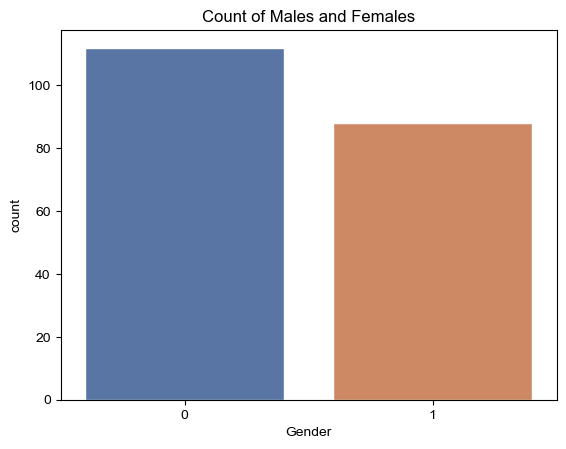

In [ ]:
# Plot the count of Male and Female customer
# Count of males and females

plt.title('Count of Males and Females')
sns.set(style = 'darkgrid')
sns.countplot(x = dataset['Gender'])

In [ ]:
# Overall descriptive statistics of the dataset

dataset.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


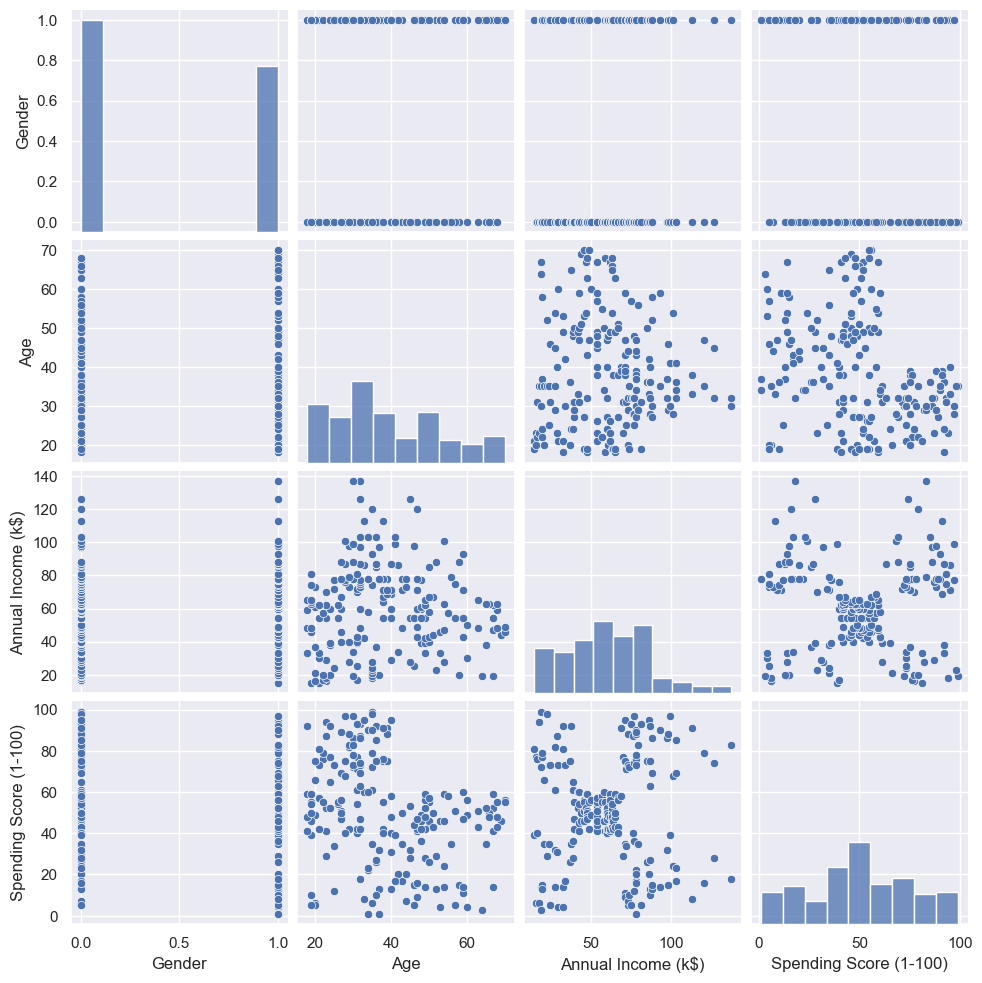

In [ ]:
# Finding correlation between features of the dataset

sns.pairplot(dataset.iloc[:, 1:5])

# IDENTIFIABLE CONCLUSIONS FROM THE PAIRPLOT

The pairplot shows that middle-aged people earn the most and young to middle-aged spend the most. Thus, a good target to focus  for new products and advertisement. Spending and earning are more or less uniform for both the genders, so gender neutral products will probably have a good market. Spending Score and Annual Income has clear clusters, thus they are good features which can be considered for clustering the customers.



In [ ]:
X = dataset.iloc[:, [3,4]]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


# What's the best value of k to set as a data scientist?



C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are les

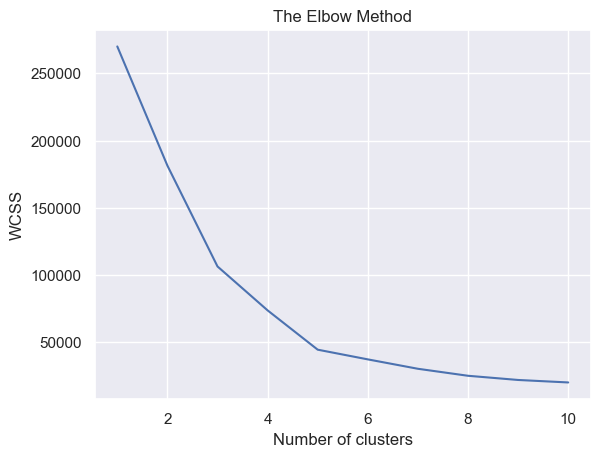

In [ ]:
# Using the elbow method to find the optimal number of clusters
from  sklearn.cluster import KMeans
wcss = []
for i in range(1,11): # Test 1 to 20 different clusters

# Loop over the indented statements 20 times to see how distance reduces till it becomes steady

    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X) # Train the model for all the 10 clusters and append into wcss list

    '''kmeans.fit(X) generates the following parameters:
    KMeans(algorithm = 'auto', copy_x = True, init = 'k-means++', max_iter = 300, n_clusters = 5, n_init = 10, n_jobs = 1, precompute_distance)
    inertia: Sum of squared distances to their closest cluster center'''

    wcss.append(kmeans.inertia_) # Add each sum of squared distances to wcss[] list

plt.plot(range(1,11), wcss) # Plot the 10 different wcss against the number of clusters
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


## The sum of squared distances started to stabilize from the 5th cluster. Therefore, the optimal number of clusters (k) is 5.

In [ ]:
# Fitting K-Means to the dataset and predicting the clusters

kmeans = KMeans(n_clusters = 5, init= 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

# The predicted cluster centers are stored in y-kmeans

# Adding the predicted clusters

X['Centroids'] = y_kmeans
X

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DELL\AppData\Local\Temp\ipykernel_20728\2916091654.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Centroids'] = y_kmeans


,Annual Income (k$),Spending Score (1-100),Centroids
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4
...,...,...,...
195,120,79,1
196,126,28,3
197,126,74,1
198,137,18,3


## Visualizing the Clusters

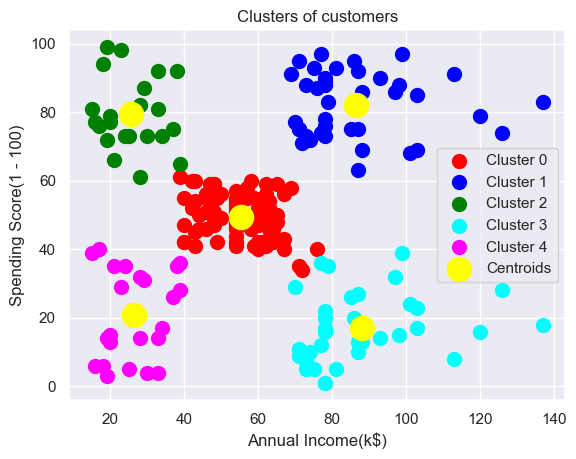

In [ ]:
# Unrip all values for all column in X DataFrame and store them in X(array)

x = X.values

# y[y_kmeans == 0, 0] is a conditioned statement that prints the value of y(i) fo all i in x, only if where y_means = 0

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 0')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 4')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1 - 100)')
plt.legend()
plt.show()

In [ ]:
x

array([[ 15,  39,   4],
       [ 15,  81,   2],
       [ 16,   6,   4],
       [ 16,  77,   2],
       [ 17,  40,   4],
       [ 17,  76,   2],
       [ 18,   6,   4],
       [ 18,  94,   2],
       [ 19,   3,   4],
       [ 19,  72,   2],
       [ 19,  14,   4],
       [ 19,  99,   2],
       [ 20,  15,   4],
       [ 20,  77,   2],
       [ 20,  13,   4],
       [ 20,  79,   2],
       [ 21,  35,   4],
       [ 21,  66,   2],
       [ 23,  29,   4],
       [ 23,  98,   2],
       [ 24,  35,   4],
       [ 24,  73,   2],
       [ 25,   5,   4],
       [ 25,  73,   2],
       [ 28,  14,   4],
       [ 28,  82,   2],
       [ 28,  32,   4],
       [ 28,  61,   2],
       [ 29,  31,   4],
       [ 29,  87,   2],
       [ 30,   4,   4],
       [ 30,  73,   2],
       [ 33,   4,   4],
       [ 33,  92,   2],
       [ 33,  14,   4],
       [ 33,  81,   2],
       [ 34,  17,   4],
       [ 34,  73,   2],
       [ 37,  26,   4],
       [ 37,  75,   2],
       [ 38,  35,   4],
       [ 38,  92

In [ ]:
print(x[0:5, :]) # Print the first 5 rows of X and all columns
print('Datatype of x = i', type (x), 'with shape', x.shape)
print('Datatype of X DataFrame =', type (X), 'with shape', x.shape)

[[15 39  4]
 [15 81  2]
 [16  6  4]
 [16 77  2]
 [17 40  4]]
Datatype of x = i <class 'numpy.ndarray'> with shape (200, 3)
Datatype of X DataFrame = <class 'pandas.core.frame.DataFrame'> with shape (200, 3)


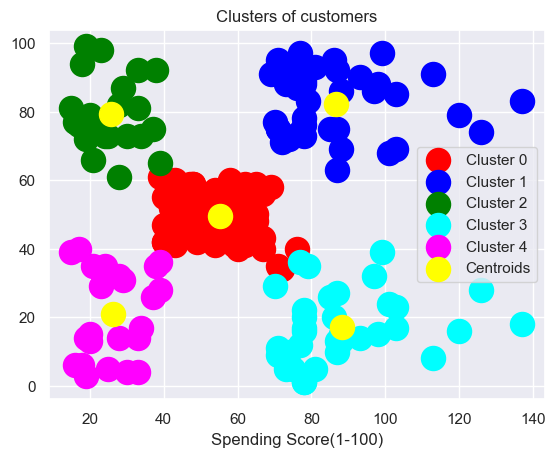

In [ ]:
# Another way to do the visualization

# Visualizing the clustres from DataFrame X

# for datapoints in cluster 0
Income_Cluster_0 = X[X.Centroids == 0]['Annual Income (k$)']
Spending_Score_Cluster_0 = X[X.Centroids == 0]['Spending Score (1-100)']
plt.scatter(Income_Cluster_0, Spending_Score_Cluster_0, s = 300, c= 'red', label = 'Cluster 0')

# for datapoints in cluster 1
Income_Cluster_1 = X[X.Centroids == 1]['Annual Income (k$)']
Spending_Score_Cluster_1 = X[X.Centroids == 1]['Spending Score (1-100)']
plt.scatter(Income_Cluster_1, Spending_Score_Cluster_1, s = 300, c= 'blue', label = 'Cluster 1')

# for datapoints in cluster 2
Income_Cluster_2 = X[X.Centroids == 2]['Annual Income (k$)']
Spending_Score_Cluster_2 = X[X.Centroids == 2]['Spending Score (1-100)']
plt.scatter(Income_Cluster_2, Spending_Score_Cluster_2, s = 300, c= 'green', label = 'Cluster 2')

# for datapoints in cluster 3
Income_Cluster_3 = X[X.Centroids == 3]['Annual Income (k$)']
Spending_Score_Cluster_3 = X[X.Centroids == 3]['Spending Score (1-100)']
plt.scatter(Income_Cluster_3, Spending_Score_Cluster_3, s = 300, c= 'cyan', label = 'Cluster 3')

# for datapoints in cluster 4
Income_Cluster_4 = X[X.Centroids == 4]['Annual Income (k$)']
Spending_Score_Cluster_4 = X[X.Centroids == 4]['Spending Score (1-100)']
plt.scatter(Income_Cluster_4, Spending_Score_Cluster_4, s = 300, c= 'magenta', label = 'Cluster 4')

# Plot all clustercentroids on their converged datapoints
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c ='yellow', label = 'Centroids')

plt.title('Clusters of customers')

# Name the x-axis as Annual Income (k$)
plt.xlabel('Annual Income (k$)')

# Name the X-axis as Annual Income (k$)
plt.xlabel('Spending Score(1-100)')
plt.legend()
plt.show()

# ASSIGNMENT

What can you infer from the plot?

## Solution


1. The clusters attract to the centroid more in Cluster 0
2. 5 customer types can be identified:
- High income earners who spend more
- High income earners who spend less
- Low income earners who spend less
- Low income earners who spend more
- Medium income earners who spend accordingly
